In [1]:
import sys
sys.path.append('../../')

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from holisticai.explainability import Explainer
from holisticai.efficacy.metrics import regression_efficacy_metrics

In [3]:
dataset = load_diabetes() # load dataset

X = dataset.data # features
y = dataset.target # target 
feature_names = dataset.feature_names # feature names

X = pd.DataFrame(X, columns=feature_names) # convert to dataframe

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

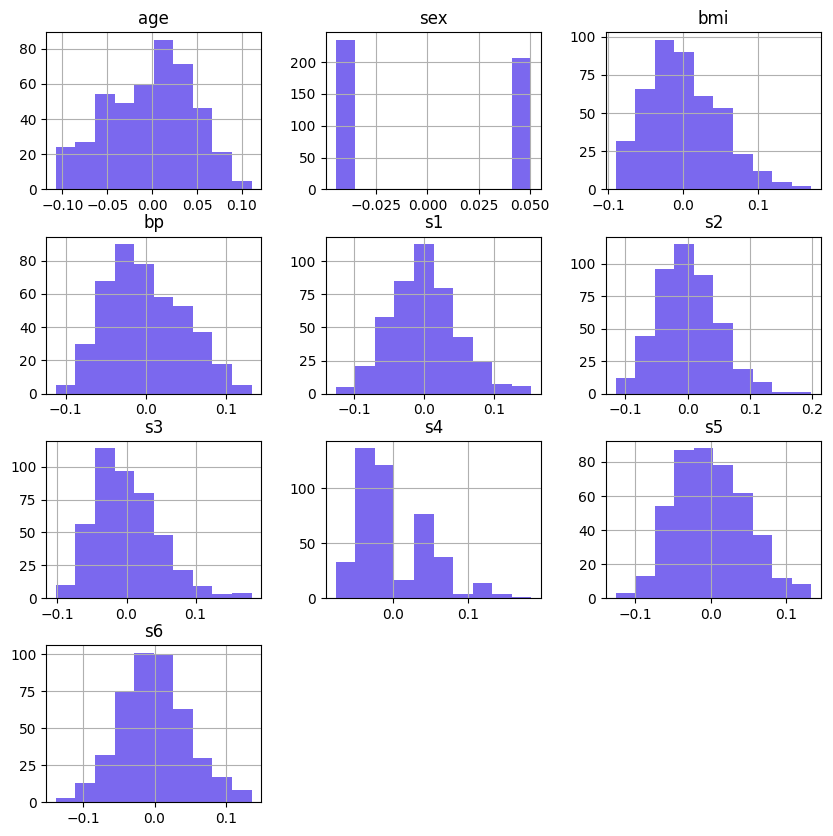

In [36]:
X.hist(bins=10, figsize=(10, 10), color = 'mediumslateblue')

[]

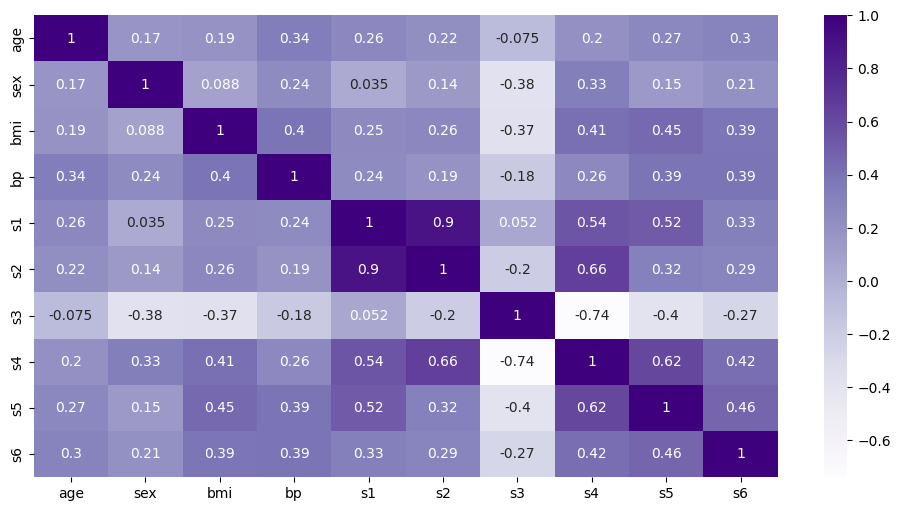

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True, cmap='Purples')
plt.plot()

In [4]:
import numpy as np
seed = np.random.seed(42) # set seed for reproducibility
# simple preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) # train test split

model = LinearRegression() # instantiate model
model.fit(X_train, y_train) # fit model

y_pred = model.predict(X_test) # compute predictions

In [5]:
# compute efficacy metrics
regression_efficacy_metrics(y_test, y_pred)

,Value,Reference
Metric,,
RMSE,53.853446,0
MAE,42.794095,0
MAPE,0.374998,0
Max Error,154.493375,0
SMAPE,0.317026,0


In [6]:
# permutation feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='permutation',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [7]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.300000,0
Importance Spread Divergence,0.648550,-
Importance Spread Ratio,0.718338,0
Global Overlap Score [Q0-Q1],0.324008,1
Global Overlap Score [Q1-Q2],0.324008,1
Global Overlap Score [Q2-Q3],0.324008,1
Global Overlap Score [Q3-Q4],0.302897,1
Global Range Overlap Score [Q0-Q1],0.770714,1
Global Range Overlap Score [Q1-Q2],0.745714,1
Global Range Overlap Score [Q2-Q3],0.804048,1


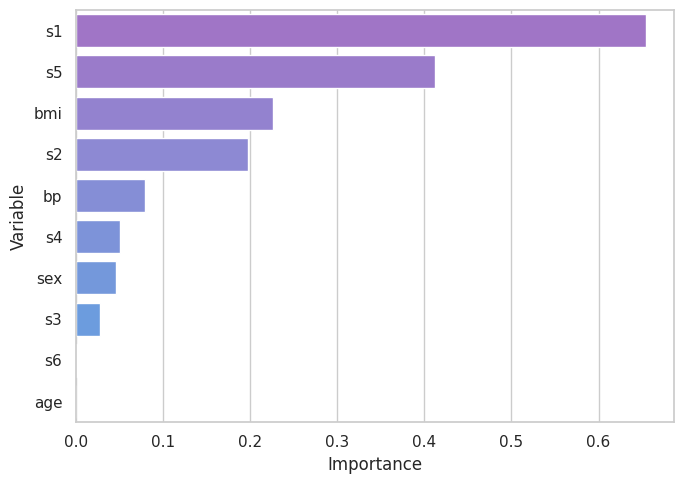

In [8]:
explainer.bar_plot(max_display=10)

In [9]:
# surrogate feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='surrogate',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [10]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.100000,0
Importance Spread Divergence,1.510041,-
Importance Spread Ratio,0.344197,0
Global Explainability Score,1.000000,1
Surrogate Efficacy Regression,0.331254,0


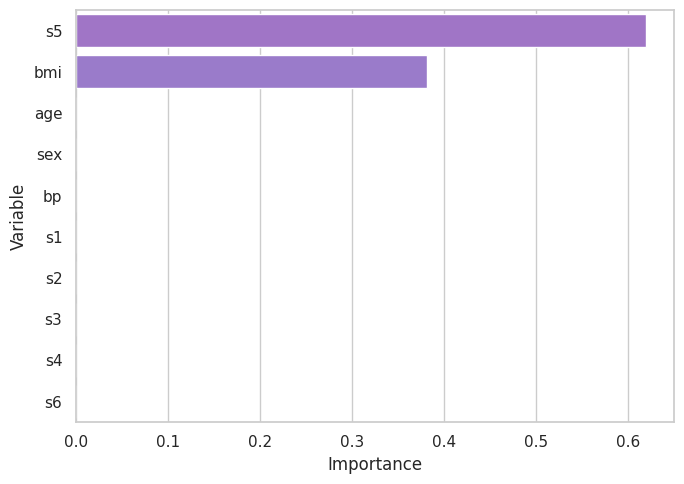

In [11]:
explainer.bar_plot(max_display=10)

In [11]:
# lime feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='lime',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [12]:
explainer.metrics()

,Value,Reference
Dataset Spread Stability,0.056677,0
Dataset Spread Mean,0.357883,0
Dataset Spread Ratio,0.985359,0
Features Spread Stability,0.263051,0
Features Spread Mean,0.132107,0
Features Spread Ratio,0.885759,0


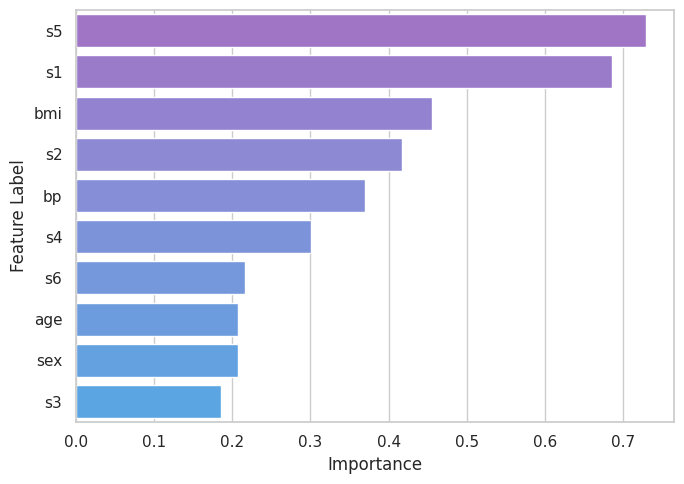

In [48]:
explainer.bar_plot(max_display=10)